## Szymon Sroka - studium przypadku

## Wybrany zbiór: Mental Health in Tech Survey

źródło: Kaggle [https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey]



## Motywacja
w projekcie chcę podjąć się analizy, która, oprócz wzbogacenia mojej wiedzy z zakresu systemów uczących się, mogłayby potencjalnie przyczynić się do poprawy jakości życia mojego oraz innych osób. Wybrałem zbiór, który zawiera informacje zebrane od osób pracujących w branży technologicznej na temat ich stanu psychicznego. Uważam, że wyniki analizy mogą być przydatne i interesujące, a ze względu na obecność zagadnień zdrowia psychicznego i branży technologicznej, bardzo dobrze wpisują się w zakres moich zainteresowań i środowisko naukowo-techniczne, w którym się znajduję.



## Atrybuty warunkowe

(podaję niżej wszystkie atrybuty dostępne w zbiorze danych, choć podczas prac nad projektem planuję zbadać istotność każdego z nich i zależnie od wyniku badania wybrać te, które niosą najwięcej informacji):



- Timestamp

- Age

- Gender

- Country

- state: If you live in the United States, which state or territory do you live in?

- self_employed: Are you self-employed?

- family_history: Do you have a family history of mental illness?

- work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

- no_employees: How many employees does your company or organization have?

- remote_work: Do you work remotely (outside of an office) at least 50% of the time?

- tech_company: Is your employer primarily a tech company/organization?

- benefits: Does your employer provide mental health benefits?

- care_options: Do you know the options for mental health care your employer provides?

- wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

- seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

- anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

- leave: How easy is it for you to take medical leave for a mental health condition?

- mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

- physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

- coworkers: Would you be willing to discuss a mental health issue with your coworkers?

- supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

- mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

- physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

- mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

- obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

- comments: Any additional notes or comments



## Atrybut decyzyjny
**,,treatment - Have you sought treatment for a mental health condition?"**  z wartościami True, False. Określa on, czy respondent szukał pomocy w celu poprawy swojej kondycji psychicznej



## Zidentyfikowane trudności:  
Potencjalną trudnością może być **obciążenie analizywanych danych** - ankieta była przeprawdzona przez organizację zajmującą się tematem zdrowia psychicznego, przez co można podejrzewać, że częściej trafiała do ludzi, którzy obserwowali u siebie problemy ze zdrowiem i szukali pomocy np. na stronie internetowej ww. organizacji, niż do ludzi zdrowych. 

Ponadto we wstępnej analizie zauważyłem **dysproporcję między liczbą kobiet i mężczyzn**, jednak myślę że jest to spowodowane nierównym rozkładem płci w sektorze technicznym. **Część danych będzie wymagała korekt** (na przykład w polu ,,płeć" czasem pojawiają się wartości inne niż ,,Male" i ,,Female", np. ,,M", ,,Fe") lub **uzupełnienia brakujących wartości**, konieczna może być również **zamiana odpowiedzi tekstowych** (np. określeń częstotliwości ,,Often" czy ,,Sometimes") na liczby. 

Jednak uważam, że w mniejszym czy większym stopniu takimi obciążeniami są obarczane wszystkie zbiory danych, szczególnie te, które informacje czerpią z ankiet, dlatego mimo zidentyfikowanych wad chciałbym podjąć się analizy tego zbioru.

## Wczytanie danych



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('survey.csv')
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


## Wstępne przetworzenie danych:
- usunięcie kolumn, które są zbędne z punktu widzenia analizy lub których znaczna część jest pusta ['state','comments','Timestamp','work_interfere']
- ujednolicenie wartości atrybutu płeć
- zastąpienie błędnych danych dotyczących wieku za pomocą średniej
- wypełnienie brakujących danych dla atrybutu self_employed. Ponieważ odsetek brakujących danych wynosił zaledwie 1.42% i wartośc tego atrybutu jest binarna, postanowiłem wypełnić je losowymi danymi


Niżej prezentuję liczność i procentowy udział wartościu pustych dla poszczególnych atrybutów

In [3]:
df.isnull().apply(lambda x: f"{x.sum()} -> { round( x.mean()*100, 2) }%")

Timestamp                         0 -> 0.0%
Age                               0 -> 0.0%
Gender                            0 -> 0.0%
Country                           0 -> 0.0%
state                         515 -> 40.91%
self_employed                   18 -> 1.43%
family_history                    0 -> 0.0%
treatment                         0 -> 0.0%
work_interfere                264 -> 20.97%
no_employees                      0 -> 0.0%
remote_work                       0 -> 0.0%
tech_company                      0 -> 0.0%
benefits                          0 -> 0.0%
care_options                      0 -> 0.0%
wellness_program                  0 -> 0.0%
seek_help                         0 -> 0.0%
anonymity                         0 -> 0.0%
leave                             0 -> 0.0%
mental_health_consequence         0 -> 0.0%
phys_health_consequence           0 -> 0.0%
coworkers                         0 -> 0.0%
supervisor                        0 -> 0.0%
mental_health_interview         

In [4]:
df = df.drop(['state','comments','Timestamp','work_interfere'], axis=1)
df.isnull().apply(lambda x: f"{x.sum()} -> { round( x.mean()*100, 2) }%")

Age                            0 -> 0.0%
Gender                         0 -> 0.0%
Country                        0 -> 0.0%
self_employed                18 -> 1.43%
family_history                 0 -> 0.0%
treatment                      0 -> 0.0%
no_employees                   0 -> 0.0%
remote_work                    0 -> 0.0%
tech_company                   0 -> 0.0%
benefits                       0 -> 0.0%
care_options                   0 -> 0.0%
wellness_program               0 -> 0.0%
seek_help                      0 -> 0.0%
anonymity                      0 -> 0.0%
leave                          0 -> 0.0%
mental_health_consequence      0 -> 0.0%
phys_health_consequence        0 -> 0.0%
coworkers                      0 -> 0.0%
supervisor                     0 -> 0.0%
mental_health_interview        0 -> 0.0%
phys_health_interview          0 -> 0.0%
mental_vs_physical             0 -> 0.0%
obs_consequence                0 -> 0.0%
dtype: object

## Ujednolicenie wartości dla atrybutu ,,płeć". 
W tym celu użyłem napisanych ręcznie reguł a także modułu ,,autocorrect", ktory poprawia literówki w słowach. W wejściowym zbiorze danych dla atrybutu płeć istniało aż 49 różnych wartości (!), są one zaprezentowane w komórce poniżej. 

In [5]:
print(len(set(df['Gender'])))
print(set(df['Gender']))

from autocorrect import Speller
spell = Speller(lang='en')

def map_gender(gender):

    val = spell(gender.lower())
    if 'female' in val or val in ['f','woman','email']: 
        return 'female'
    elif 'male' in val or 'guy' in val or val in ['m','man','mal','mail','make','cis man']: 
        return 'male'
    elif 'queer' in val or 'trans' in val or val in ['androgen','agender','fluid','non-binary','gender','envy','p','all','neuter','nah','a little about you']: 
        return 'queer'
    
    print(val)
    raise AssertionError()

for gen in set(df['Gender']):
    if map_gender(gen)=="UNDEFINED": print(gen,spell(gen.lower()), map_gender(gen))

df['Gender'] = df['Gender'].apply(map_gender)
df

49
{'Trans-female', 'Woman', 'woman', 'msle', 'Female (cis)', 'Man', 'Mail', 'ostensibly male, unsure what that really means', 'Malr', 'Female ', 'maile', 'something kinda male?', 'Femake', 'cis male', 'non-binary', 'Cis Male', 'Trans woman', 'p', 'female', 'Androgyne', 'Male ', 'Enby', 'Female (trans)', 'fluid', 'male leaning androgynous', 'Make', 'Cis Man', 'F', 'male', 'Male', 'queer/she/they', 'Guy (-ish) ^_^', 'queer', 'A little about you', 'Male-ish', 'Nah', 'All', 'f', 'Cis Female', 'Male (CIS)', 'Genderqueer', 'Agender', 'Mal', 'Neuter', 'femail', 'm', 'Female', 'cis-female/femme', 'M'}


,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,NaN,No,Yes,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,NaN,No,No,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,NaN,No,No,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,NaN,Yes,Yes,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,NaN,No,No,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,male,United States,No,Yes,Yes,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,female,United States,No,No,No,100-500,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


## Wypełnienie i skorygowanie brakujących lub błędnych danych
... dla atrybutu wiek (z użyciem średniej) oraz dla atrybutu ,,self_employed". W drugim przypadku zdecydowałem się uzupełnić brakujące dane losowo, ponieważ puste rekordy stanowiły zaledwie 1.43% wszystkich wartości; ulepszając analizę rozważyłbym wypełnienie ich na przykład za pomocą algorytmu, który analizuje wzajemne podobieństwa obserwacji i na podstawie uzyskanych wyników uzupełnia brakujące wartości.

In [6]:
import random

print("Unikalne wartości dla atrybutów wiek i self_employed przed zastosowaniem poprawek \n")
for col in ['Age','self_employed']:
    print(col, set(df[col]))
    
df['Age'] = df['Age'].apply(lambda x: df['Age'].median() if x < 5 or x > 100  else x)
df['self_employed'] = df['self_employed'].apply(lambda x: 'Yes' if random.random() < 0.5 else 'No')

print("\nUnikalne wartości  po zastosowaniu poprawek\n")

for col in ['Age','self_employed']:
    print(col, set(df[col]))

Unikalne wartości dla atrybutów wiek i self_employed przed zastosowaniem poprawek 

Age {5, 8, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, -1726, 72, 329, -29, -1, 99999999999}
self_employed {nan, 'No', 'Yes'}

Unikalne wartości  po zastosowaniu poprawek

Age {5.0, 8.0, 11.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 60.0, 61.0, 62.0, 65.0, 72.0}
self_employed {'Yes', 'No'}


### Ponowne sprawdzenie liczby pustych wartości dla poszczególnych atrubutów

In [7]:
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

## Rozkład wartości wybranych atrybutów


Rozkład wartości atrybutu decyzyjnego ,,treatment" jest równomierny, stąd nie zachodzi potrzeba używania metod równoważenia liczności klas przy późniejeszym uczeniu. Jednak wartości atrybutu ,,płeć" są niezbalansowane, stąd należy mieć na uwadze obciążenie z niego wynikające.

In [8]:
df['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

In [9]:
df['Gender'].value_counts()

male      995
female    250
queer      14
Name: Gender, dtype: int64

Text(0.5, 0, 'Wiek')

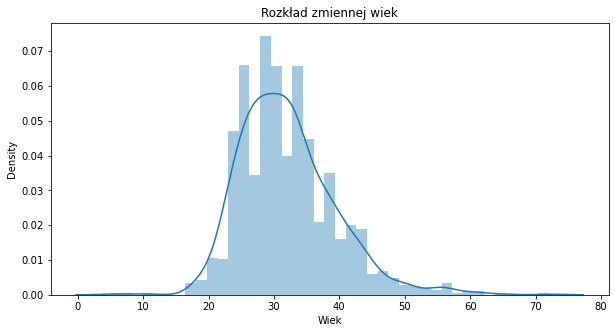

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(df["Age"])
plt.title("Rozkład zmiennej wiek")
plt.xlabel("Wiek")

## Zamiana wartości tekstowych na numeryczne z użyciem one-hot encoding

Zamianie podlegają wszystkie atrybuty z wyłączeniem wieku oraz atrybutu decyzyjnego - treatment, który domyślnie przyjmuje wartości binarne (0/1)

In [11]:
cols = list(filter(lambda x: x not in ['Age', 'treatment'],df.columns.values.tolist()))

df = pd.get_dummies(df,
                     prefix=cols, 
                     columns=cols)
df.columns

Index(['Age', 'treatment', 'Gender_female', 'Gender_male', 'Gender_queer',
       'Country_Australia', 'Country_Austria', 'Country_Bahamas, The',
       'Country_Belgium', 'Country_Bosnia and Herzegovina',
       ...
       'mental_health_interview_No', 'mental_health_interview_Yes',
       'phys_health_interview_Maybe', 'phys_health_interview_No',
       'phys_health_interview_Yes', 'mental_vs_physical_Don't know',
       'mental_vs_physical_No', 'mental_vs_physical_Yes', 'obs_consequence_No',
       'obs_consequence_Yes'],
      dtype='object', length=110)

## Skalowanie danych

Do skalowania danych użyłem ,,MinMaxScaler" - metoda skaluje dane w taki sposób, że minimalna wartość dla danego atrybutu po przeskalowaniu wynosi 0, a maksymalna 1. Przeskalowanie danych jest ważne przy podawaniu danych do klasyfikatorów, które operują na mierze odległości w procesie uczenia, a również tego typu klasyfikatory użyję do wykonania predykcji.

In [12]:
X = df.drop(columns='treatment')
y = df['treatment'].apply(lambda x: 1 if x=='Yes' else 0)

X

,Age,Gender_female,Gender_male,Gender_queer,Country_Australia,Country_Austria,"Country_Bahamas, The",Country_Belgium,Country_Bosnia and Herzegovina,Country_Brazil,...,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_No,obs_consequence_Yes
0,37.0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
1,44.0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,32.0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,31.0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,31.0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26.0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
1255,32.0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
1256,34.0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
1257,46.0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
X

,Age,Gender_female,Gender_male,Gender_queer,Country_Australia,Country_Austria,"Country_Bahamas, The",Country_Belgium,Country_Bosnia and Herzegovina,Country_Brazil,...,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_No,obs_consequence_Yes
0,0.477612,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.582090,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.402985,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.388060,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.388060,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.313433,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1255,0.402985,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1256,0.432836,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1257,0.611940,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### Selekcja atrybutów

Selekcję atrybutów wykonałem z pomocą ExtraTreesClassifier, ponieważ, bazując na dotychczas zebranym doświadczeniu, stwierdziłem, że radzi on sobie z tym zadaniem najlepiej. Ze względu na dużą liczbę atrybutów powstałą w wyniku one-hot encoding, pod wykresem wypisałem najbardziej istotne atrybuty wraz z uzyskanymi wynikami. W kolejnym kroku na podstawie uzyskanych wyników wybrałem najbardziej istotne atrybuty (SelectFromModel) i odpowiednio zmodyfikowałem zbiór uczący i testowy

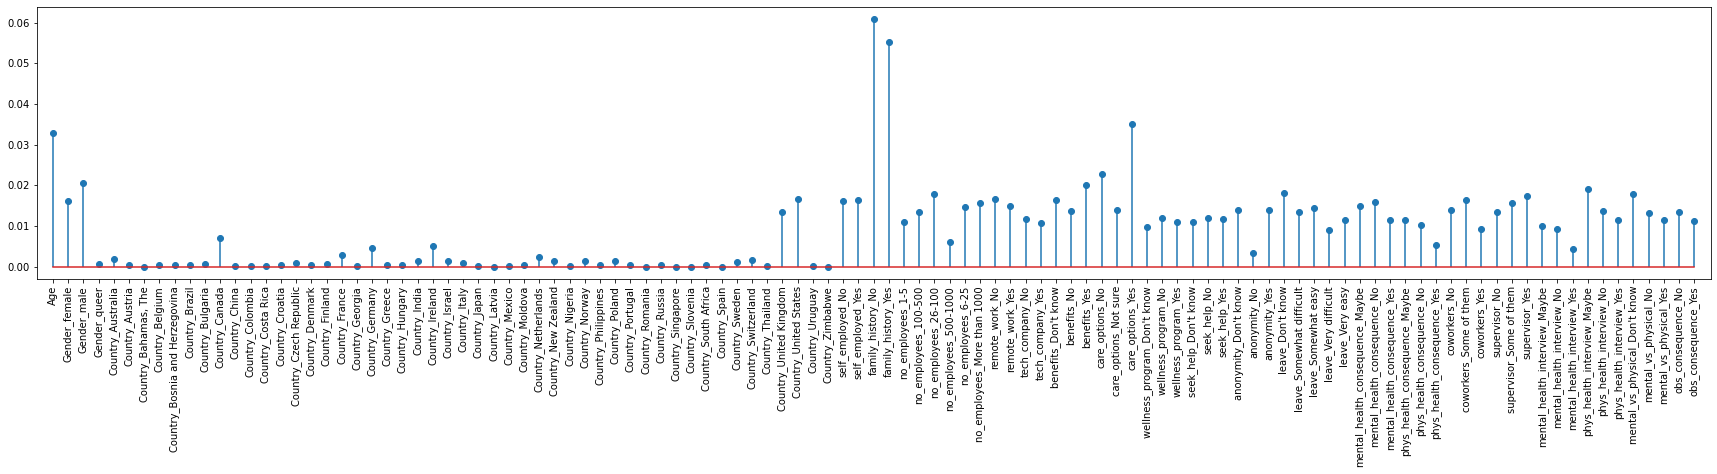

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)

plt.figure(figsize=(30, 5))
plt.stem(list(X_train.columns), list(clf.feature_importances_), use_line_collection=True)
plt.xticks(rotation=90)
plt.margins(x=0.01)
plt.show()

In [15]:
importances = sorted(list(zip(list(X_train.columns), list(clf.feature_importances_))),key=lambda x: x[1], reverse=True)
importances[:10]

[('family_history_No', 0.06076670407348434),
 ('family_history_Yes', 0.05525113990212859),
 ('care_options_Yes', 0.035109249990164564),
 ('Age', 0.03287916280034243),
 ('care_options_No', 0.02272712003794351),
 ('Gender_male', 0.020521595270424187),
 ('benefits_Yes', 0.019999958675938304),
 ('phys_health_interview_Maybe', 0.019186590480429838),
 ("leave_Don't know", 0.01820756625875231),
 ("mental_vs_physical_Don't know", 0.01796131701348274)]

In [16]:
model = SelectFromModel(clf, prefit=True)
feature_names = X_train.columns[ model.get_support() ]

print(f"Wybrane atrybuty: {feature_names}")

X_train, X_test = X_train[feature_names], X_test[feature_names]
X = X[feature_names]
X_train

Wybrane atrybuty: Index(['Age', 'Gender_female', 'Gender_male', 'Country_United Kingdom',
       'Country_United States', 'self_employed_No', 'self_employed_Yes',
       'family_history_No', 'family_history_Yes', 'no_employees_1-5',
       'no_employees_100-500', 'no_employees_26-100', 'no_employees_6-25',
       'no_employees_More than 1000', 'remote_work_No', 'remote_work_Yes',
       'tech_company_No', 'tech_company_Yes', 'benefits_Don't know',
       'benefits_No', 'benefits_Yes', 'care_options_No',
       'care_options_Not sure', 'care_options_Yes',
       'wellness_program_Don't know', 'wellness_program_No',
       'wellness_program_Yes', 'seek_help_Don't know', 'seek_help_No',
       'seek_help_Yes', 'anonymity_Don't know', 'anonymity_Yes',
       'leave_Don't know', 'leave_Somewhat difficult', 'leave_Somewhat easy',
       'leave_Very easy', 'mental_health_consequence_Maybe',
       'mental_health_consequence_No', 'mental_health_consequence_Yes',
       'phys_health_consequence

,Age,Gender_female,Gender_male,Country_United Kingdom,Country_United States,self_employed_No,self_employed_Yes,family_history_No,family_history_Yes,no_employees_1-5,...,mental_health_interview_Maybe,mental_health_interview_No,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_No,obs_consequence_Yes
423,0.402985,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
590,0.432836,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1039,0.447761,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1027,0.208955,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
215,0.328358,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0.358209,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1095,0.462687,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1130,0.552239,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
860,0.402985,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


Z otrzymanych informacji można wywnioskować, że największy wpływ na to, czy badana osoba w ostatnim czasie szukała pomcy, ma między innymi:
- rodzinne obciążenie chorobami
- wiek
- wiedza o dostępnych opcjach opieki medycznej w pracy
- obecność benefitów w miejscu pracy
- a także czy dana osoba pracuje zdalnie/stacjonarnie i czy jest samozatrudniona

### Trening modeli i analiza uzyskanych trafności. Macierze pomyłek.
Zdecydowałem się na użycie trzech klasyfikatorów:
- DecisionTreeClassifier - jako dobrze wyjaśnialny, prosty i dość skuteczny klasyfikator. Posłuży jako punkt odniesienia dla bardziej złożonych klasyfikatorów.
- CatBoost - ponieważ podczas pracy laboratoryjnej obserwowałem, że otrzymywał bardzo dobre wyniki
- VotingClassifier (QDA + DecisionTreeClassifier) - aby sprawdzić efekt użycia zespołu klasyfikatorów

## DecisionTreeClassifier
Przy tuningu parametrów są testowane następujące ich wartości:
```
'criterion':['gini','entropy'],
'max_depth': w zakresie od 1 do 20 z krokiem co 1

```

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

# list to store classifiers output quality
res = []

parameters = {'criterion':['gini','entropy'],'max_depth':range(1,20,1)}
clf = RandomizedSearchCV(DecisionTreeClassifier(), parameters,refit=True, cv=10, n_jobs=4, verbose=1)
clf.fit(X_train, y_train)

acc, std = clf.cv_results_['mean_test_score'][clf.best_index_]*100, clf.cv_results_['std_test_score'][clf.best_index_]*100

print(f"ACC={acc}%")
print(f"STD={std}%")

res += [dict(name="DecisionTree", acc=acc, std=std) for acc, std in zip(clf.cv_results_['mean_test_score'], clf.cv_results_['std_test_score'])]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
ACC=70.83893557422968%
STD=7.7881461794122835%


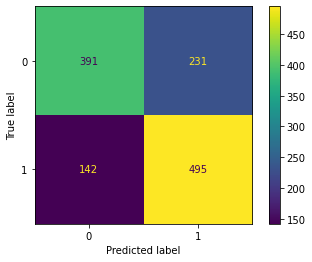

In [18]:
plot_confusion_matrix(clf.best_estimator_, X, y) 

[Text(0.5, 0.8333333333333334, 'family_history_Yes <= 0.5\nentropy = 1.0\nsamples = 843\nvalue = [422, 421]\nclass = y[0]'),
 Text(0.25, 0.5, 'care_options_Yes <= 0.5\nentropy = 0.931\nsamples = 511\nvalue = [334, 177]\nclass = y[0]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.818\nsamples = 358\nvalue = [267, 91]\nclass = y[0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.989\nsamples = 153\nvalue = [67, 86]\nclass = y[1]'),
 Text(0.75, 0.5, 'care_options_Yes <= 0.5\nentropy = 0.834\nsamples = 332\nvalue = [88, 244]\nclass = y[1]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.944\nsamples = 180\nvalue = [65, 115]\nclass = y[1]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.613\nsamples = 152\nvalue = [23, 129]\nclass = y[1]')]

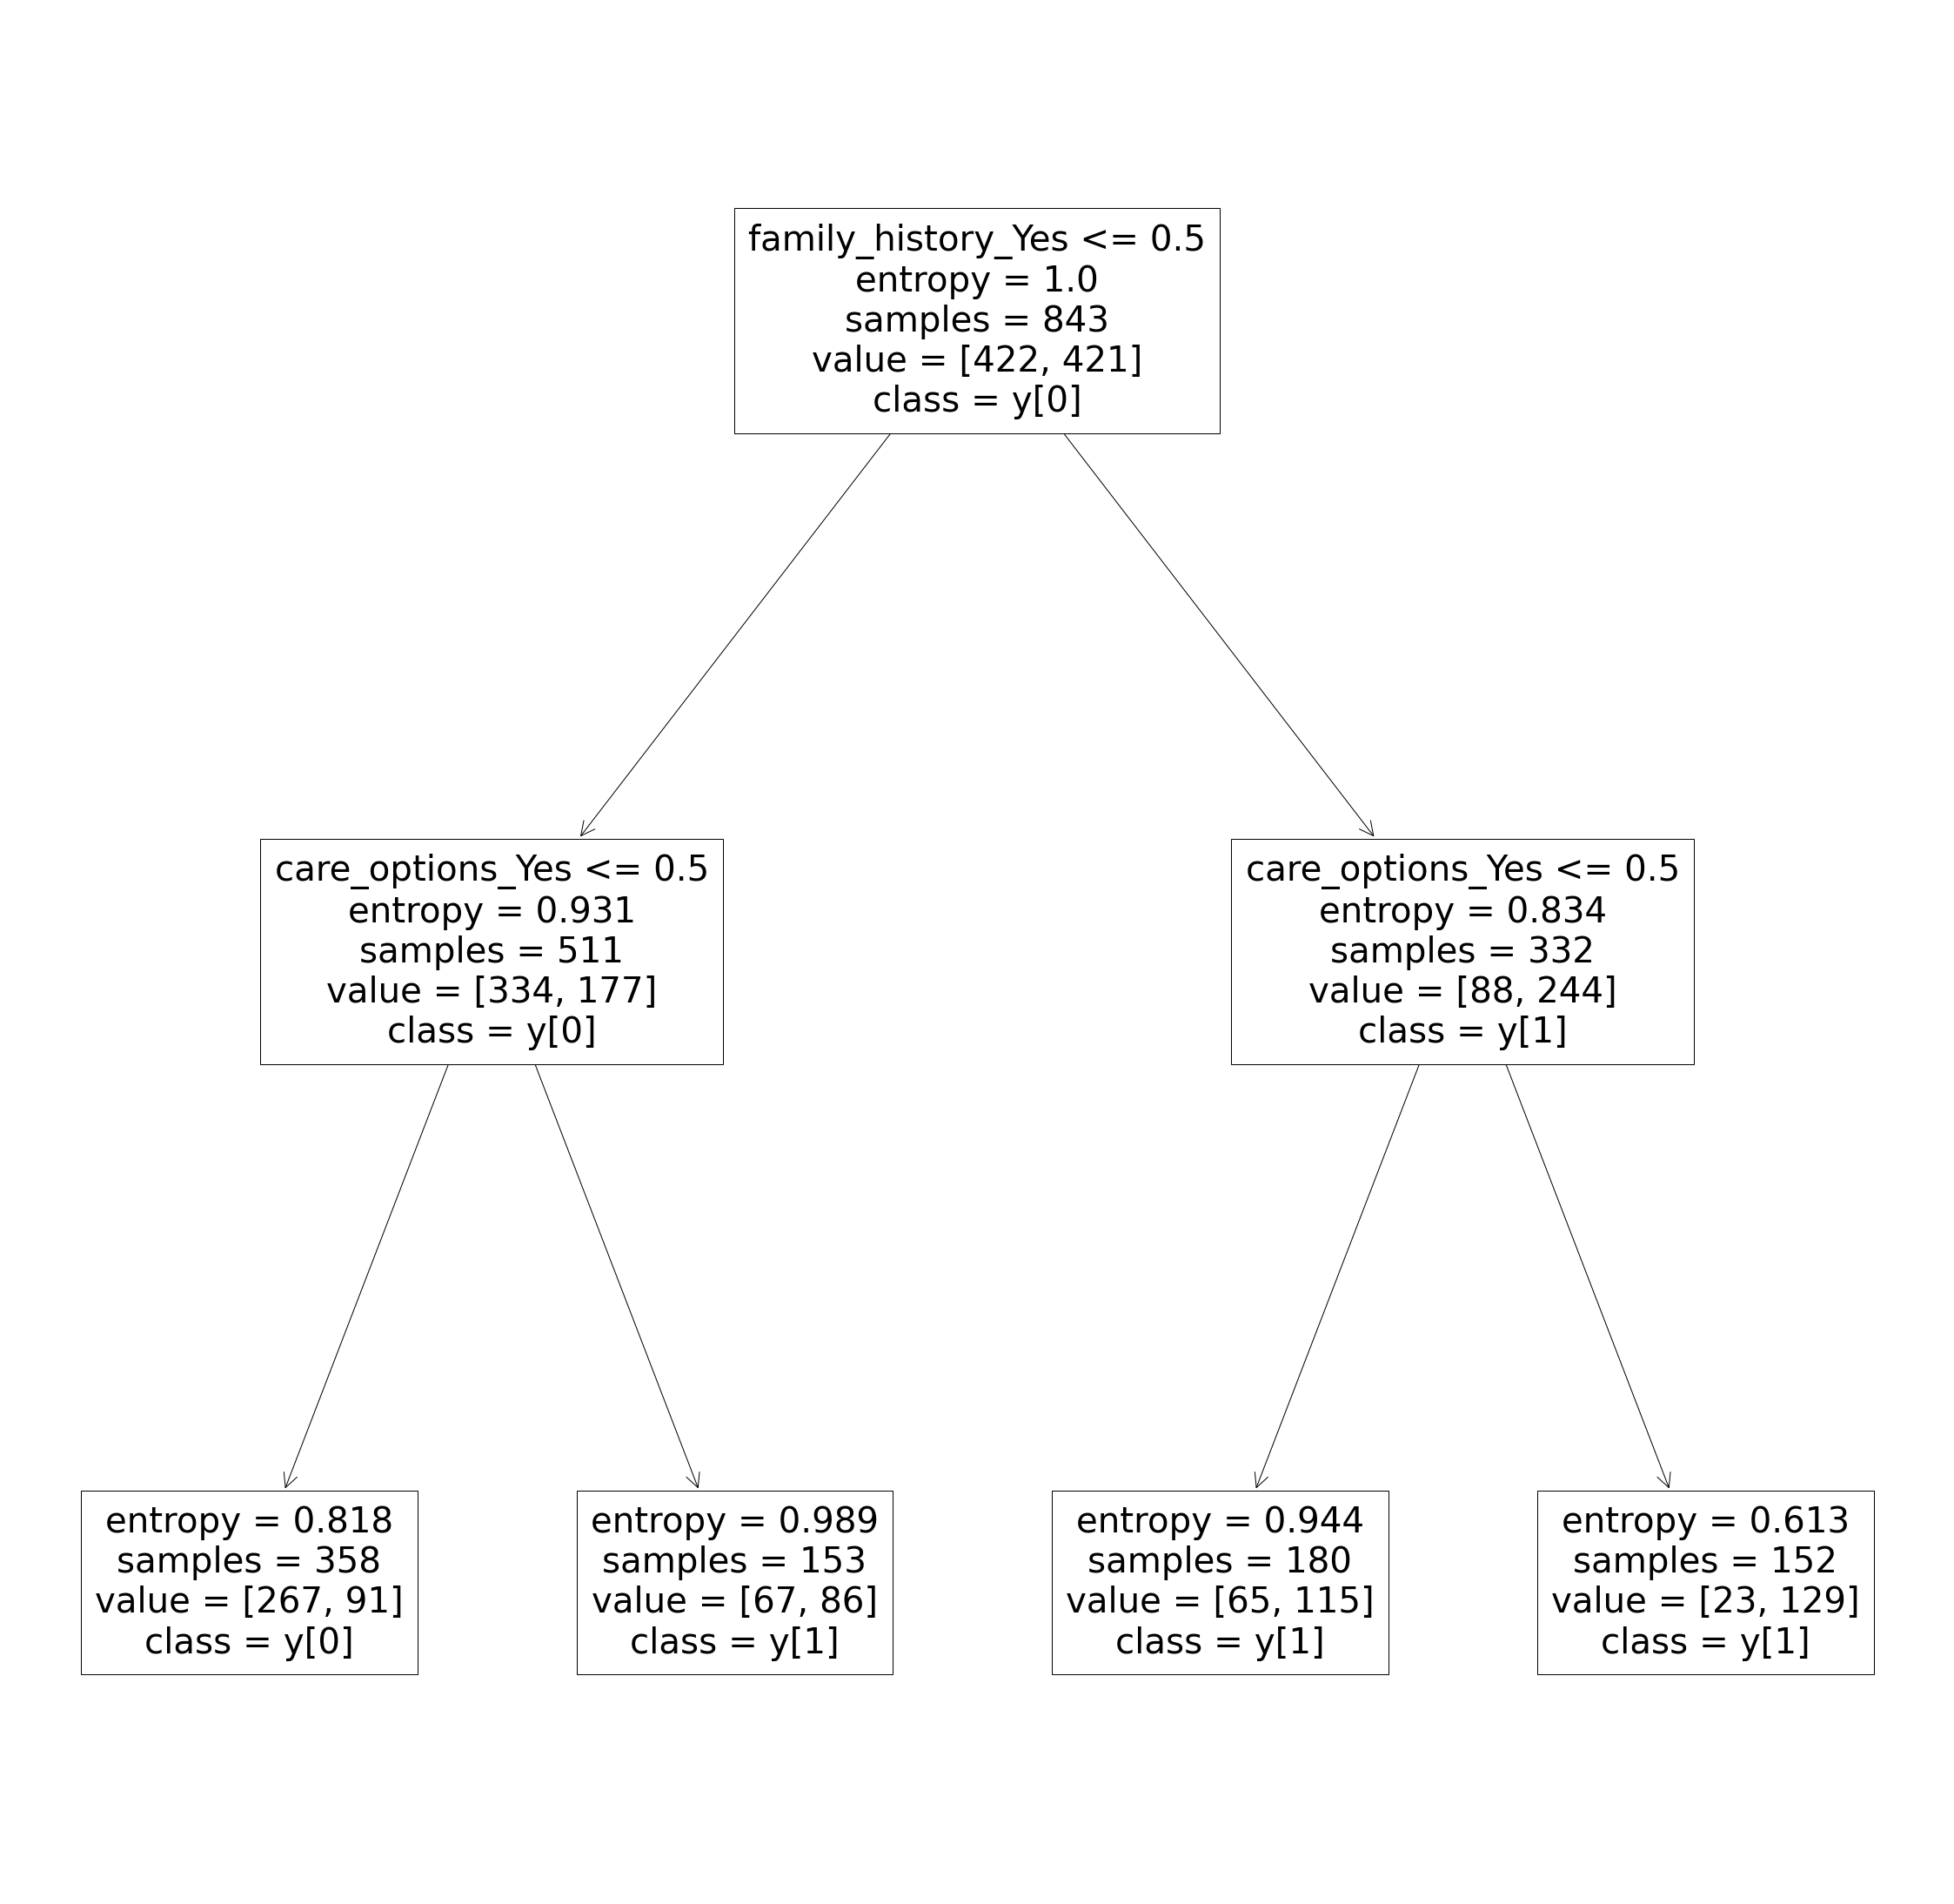

In [19]:
from sklearn import tree

plt.figure(figsize=(40, 40))
tree.plot_tree(clf.best_estimator_, feature_names=feature_names, class_names=True)

## CatBoost Classifier

Utworzenie klasyfikatora oraz tuning parametrów. Testowane wartości:
```
 'iterations': [5, 10,100,1000],
 'depth'  :  [1,2,3,4,5,6,7,8,9,10],
 'learning_rate' : [0.001, 0.01, 0.1],
 'l2_leaf_reg': [1,3,10,100]
```

In [20]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(logging_level='Silent', cat_features=[name for name in X_train.columns if X_train[name].dtype == "O"])

parameters = {    
                  'iterations': [5, 10,100,200],
                  'depth'  :  [1,2,3,4,5,6,7,8,9,10],
                  'learning_rate' : [0.001, 0.01, 0.1],
                  'l2_leaf_reg': [1,3,10,100], 
             }


clf = RandomizedSearchCV(model, parameters, refit=True,  cv=10, n_jobs=4, verbose=1)
clf.fit(X_train, y_train)


acc, std = clf.cv_results_['mean_test_score'][clf.best_index_]*100, clf.cv_results_['std_test_score'][clf.best_index_]*100

print(f"ACC={acc}%")
print(f"STD={std}%")

res += [dict(name="CatBoost", acc=acc, std=std) for acc, std in zip(clf.cv_results_['mean_test_score'], clf.cv_results_['std_test_score'])]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
ACC=70.24369747899158%
STD=6.89438826194107%


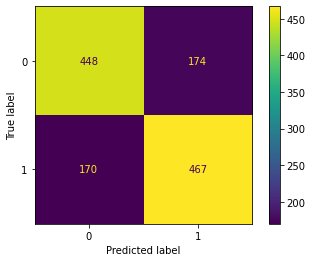

In [21]:
plot_confusion_matrix(clf.best_estimator_, X, y) 

## VotingClassifier (QDA + DecisionTreeClassifier)

In [22]:
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np

model = VotingClassifier(  [("quadratic",QuadraticDiscriminantAnalysis()),  ("tree", DecisionTreeClassifier())],n_jobs=4)

grid = dict(
    quadratic__reg_param=np.arange(0, 0.01, 1),
    tree__min_samples_leaf=range(1, 100),
    tree__max_features=['sqrt', 'log2', None],
    tree__criterion = ["gini","entropy"],
    voting=['soft', 'hard'],
)

clf = RandomizedSearchCV(model, grid, refit=True, cv=10, n_jobs=4,  verbose=1)
clf.fit(X, y)

acc, std = clf.cv_results_['mean_test_score'][clf.best_index_]*100, clf.cv_results_['std_test_score'][clf.best_index_]*100

print(f"ACC={acc}%")
print(f"STD={std}%")

res += [dict(name="Voting (QDA + DecTree)", acc=acc, std=std) for acc, std in zip(clf.cv_results_['mean_test_score'], clf.cv_results_['std_test_score'])]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
ACC=60.927619047619054%
STD=6.144122391333654%


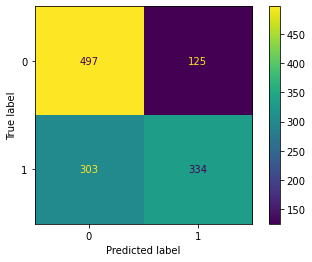

In [23]:
plot_confusion_matrix(clf.best_estimator_, X, y) 

## Analiza uzyskanych wyników. Wnioski.

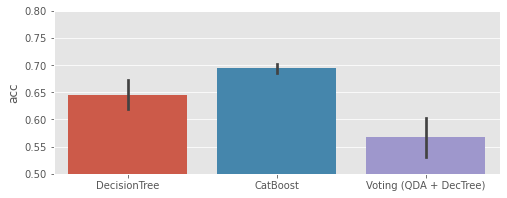

In [24]:
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize=(8, 3))
sns.barplot(x='name', y='acc', ci='sd', data=pd.DataFrame(res))
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylim(0.5, 0.8)
plt.show()

Spośród testowanych klasyfikatorów najlepszą trafnością i najmniejszym odchyleniem standardowym wykazał się CatBoost. Nieco gorsze okazało się drzewo decyzyjne, a wyniki najgorszej jakości dawał VotingClassifier. 

O ile dobra jakość predykcji CatBoost nie jest zaskoczeniem, to słaby wynik VotingClassifier i relatywnie duże odchylenie standardowe otrzymywanych wyników jest dla mnie zastanawiające. Przypuszczam, że aby poprawić jakość predykcji w tym wypadku należałoby zmienić typ klasyfikatorów składowych biorących udział w głosowaniu nad wynikiem predykcji.

Cennych informacji dostarcza analiza wag w wyuczonym drzewie decyzyjnym i jego wizualizacji; na ich podstawie można stwierdzić, że rodzinne obciążenie chorobami psychicznymi ma największy wpływ na wynik predykcji; innym ważnym atrybutem jest także wiedza o tym, jakie środki pomocy medycznej zapewnia pracodawca; przykładowo gdy osoba nie ma rodzinnego obciążenia chorobami psychicznymi i posiada wiedzę o tym, jakie opcje opieki zdrowotnej zapewnia jego pracodawca, to bardzo mało prawdopodobne, że będzie szukała pomocy w zakresie zdrowia psychicznego.

Ponieważ analiza obejmuje tematy związane ze zdrowiem i medycyną, porównałem użyte klasyfikatory również pod kątem popełnianych błędów ,,false negative", które, pojawiając się w rzeczywistym systemie medycznym, mogą powodować bardzo złe skutki, bo oznaczają, że w procesie klasyfikacji nie wykryto problemu, mimo że rzeczywiście on istniał:
- DecisionTree: 142 FN
- CatBoost: 170 FN
- VotingClassifier: 303 FN

przy sumarycznej liczbie przypadków wynoszącej 843.

Powyższe zestawienie pokazuje, że drzewo decyzyjne, mimo przeciętnej średniej trafności, popełniło najmniej błędów typu ,,false negative", stąd w przypadku ewentualnych przyszłych prac nad projektem nie odrzucałbym tego klasyfikatora. CatBoost wypadł niewiele gorzej, a VotingClassifier popełnił aż 303 błędy FN, co w połączeniu z bardzo słabą ogólną trafnością daje podstawy do uznania go za nieskuteczny.

W przypadku dalszych prac nad projektem skupiłbym się na bardziej odpowiednim uzupełnieniu brakujących danych (np. przy użyciu narzędzi uczenia maszynowego), zastosowania innych typów klasyfikatorów w VotingClassifier lub innym klasyfikaotrze zespołowym, a także spróbowałbym pozyskać lepszej jakości dane uczące - analizowany zbiór pochodzi z 2014 roku i istnieją jego kolejne wydania, co pozwala przypuszczać, że nowsze wersje są lepiej przygotowane jakościowo i merytorycznie.